In [1]:
! pip install deepvision-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import deepvision

config = {
    'batch_size': 16,
    'epochs': 5
}

In [3]:
import torch

from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import pytorch_lightning as pl
#%matplotlib notebook

device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Resize([224, 224])])

cifar_train = CIFAR10('cifar10', train=True, download=True, transform=transform)
cifar_test = CIFAR10('cifar10', train=False, download=True, transform=transform)

train_dataloader = DataLoader(cifar_train, batch_size=config['batch_size'], drop_last=True)
val_dataloader = DataLoader(cifar_test, batch_size=config['batch_size'], drop_last=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
pt_model = deepvision.models.ResNet18V2(include_top=True,
                                       classes=10,
                                       input_shape=(3, 224, 224),
                                       backend='pytorch')

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pt_model.parameters(), 1e-5)

pt_model.compile(loss=loss, optimizer=optimizer)
trainer = pl.Trainer(accelerator=device, max_epochs=config['epochs'])
trainer.fit(pt_model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | acc       | MulticlassAccuracy | 0     
1 | conv1     | Conv2d             | 9.5 K 
2 | maxpool1  | MaxPool2d          | 0     
3 | stacks    | ModuleList         | 11.2 M
4 | batchnorm | BatchNorm2d        | 1.0 K 
5 | pool      | AvgPool2d          | 0     
6 | top_dense | Linear             | 5.1 K 
7 | loss      | CrossEntropyLoss   | 0     
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainabl

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [5]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

feature_analysis = deepvision.evaluation.FeatureAnalyzer(pt_model, 
                                                         train_dataloader,
                                                         limit_batches=500,
                                                         classnames=classnames,
                                                         backend='pytorch')

In [6]:
feature_analysis.extract_features()


Processing finished. Extracting features and classes...
Features extracted. You can now visualize them or perform analysis without re-running the extraction.


Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8016 samples in 0.004s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 8016 samples in 0.380s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8016
[t-SNE] Computed conditional probabilities for sample 2000 / 8016
[t-SNE] Computed conditional probabilities for sample 3000 / 8016
[t-SNE] Computed conditional probabilities for sample 4000 / 8016
[t-SNE] Computed conditional probabilities for sample 5000 / 8016
[t-SNE] Computed conditional probabilities for sample 6000 / 8016
[t-SNE] Computed conditional probabilities for sample 7000 / 8016
[t-SNE] Computed conditional probabilities for sample 8000 / 8016
[t-SNE] Computed conditional probabilities for sample 8016 / 8016
[t-SNE] Mean sigma: 0.000246
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.828545
[t-SNE] KL divergence after 1000 iterations: 0.403189


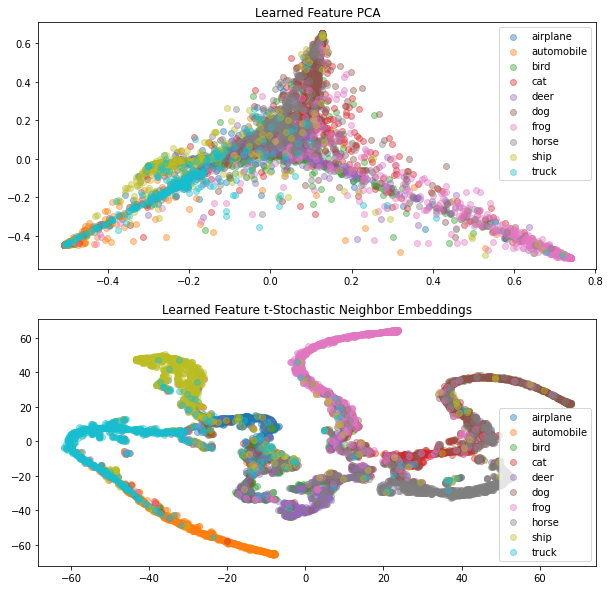

In [7]:
# May take a while on some CPUs. You may tweak t-SNE options with
# perplexity and n_iter
feature_analysis.feature_analysis(components=2)

Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8016 samples in 0.011s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 8016 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8016
[t-SNE] Computed conditional probabilities for sample 2000 / 8016
[t-SNE] Computed conditional probabilities for sample 3000 / 8016
[t-SNE] Computed conditional probabilities for sample 4000 / 8016
[t-SNE] Computed conditional probabilities for sample 5000 / 8016
[t-SNE] Computed conditional probabilities for sample 6000 / 8016
[t-SNE] Computed conditional probabilities for sample 7000 / 8016
[t-SNE] Computed conditional probabilities for sample 8000 / 8016
[t-SNE] Computed conditional probabilities for sample 8016 / 8016
[t-SNE] Mean sigma: 0.000409
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.668072
[t-SNE] KL divergence after 1000 iterations: 0.339097


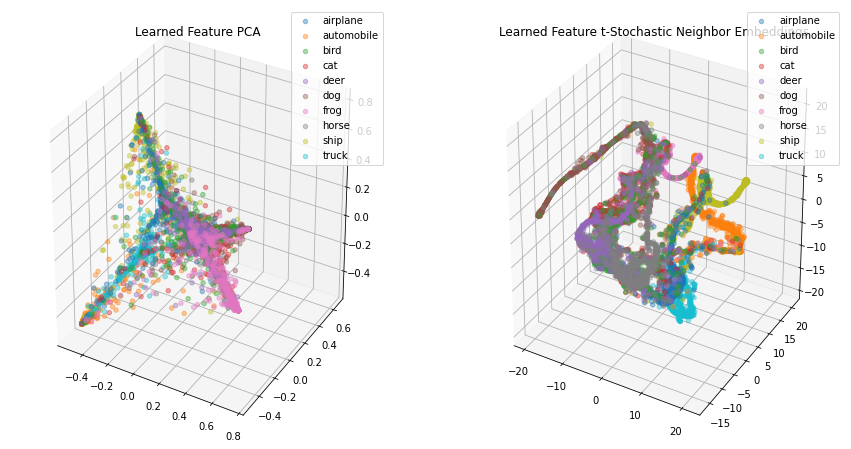

In [8]:
feature_analysis.feature_analysis(components=3, figsize=(15, 8))

In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf

(train_set, test_set), info = tfds.load("cifar10", 
                                           split=["train", "test"],
                                           as_supervised=True, with_info=True)

class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

def preprocess_img(img, label):
    img = tf.image.resize(img, (224, 224))
    return img, label

train_set = train_set.map(preprocess_img).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)
test_set = test_set.map(preprocess_img).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteWQ0018/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteWQ0018/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [10]:
tf_model = deepvision.models.ViTTiny16(include_top=True,
                                       classes=10,
                                       input_shape=(224, 224, 3),
                                       backend='tensorflow')

tf_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
  metrics=['accuracy']
)

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
history = tf_model.fit(train_set, epochs=config['epochs'], validation_data=test_set)

Epoch 1/5
3125/3125 [==============================] - 446s 129ms/step - loss: 2.1152 - accuracy: 0.2066 - val_loss: 2.0454 - val_accuracy: 0.2390
Epoch 2/5
3125/3125 [==============================] - 396s 127ms/step - loss: 1.9780 - accuracy: 0.2593 - val_loss: 1.9140 - val_accuracy: 0.2811
Epoch 3/5
3125/3125 [==============================] - 388s 124ms/step - loss: 1.8495 - accuracy: 0.3073 - val_loss: 1.7702 - val_accuracy: 0.3439
Epoch 4/5
3125/3125 [==============================] - 391s 125ms/step - loss: 1.7315 - accuracy: 0.3589 - val_loss: 1.7073 - val_accuracy: 0.3725
Epoch 5/5
3125/3125 [==============================] - 390s 125ms/step - loss: 1.6473 - accuracy: 0.3910 - val_loss: 1.6472 - val_accuracy: 0.3963


In [12]:
feature_analysis = deepvision.evaluation.FeatureAnalyzer(tf_model, 
                                                         train_set,
                                                         limit_batches=500,
                                                         classnames=class_names,
                                                         backend='tensorflow')


In [13]:
feature_analysis.extract_features()

Processing batch 499/3125
Processing finished. Extracting features and classes...
Features extracted. You can now visualize them or perform analysis without re-running the extraction.


Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.005s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 8000 samples in 0.464s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.012465
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.129700
[t-SNE] KL divergence after 1000 iterations: 0.574090


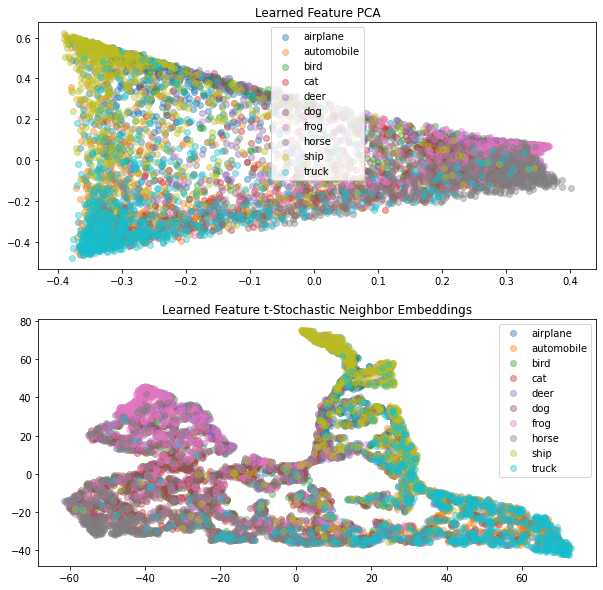

In [14]:
# May take a while on some CPUs. You may tweak t-SNE options with
# perplexity and n_iter
feature_analysis.feature_analysis(components=2)

Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.006s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 8000 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.024372
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.472572
[t-SNE] KL divergence after 1000 iterations: 0.583271


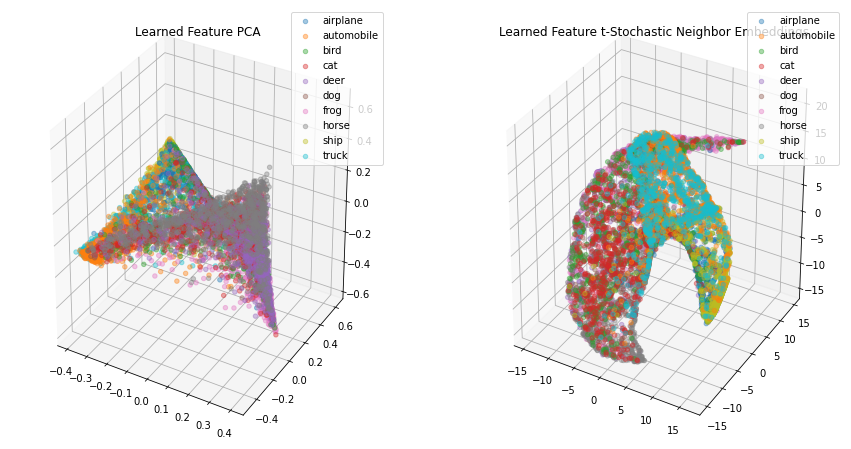

In [15]:
feature_analysis.feature_analysis(components=3, figsize=(15, 8))